# Ensembling VGG19-Xception

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Images**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
images = "/content/drive/MyDrive/parkinsons t2/train"

In [ ]:
folders = os.listdir(images)
print(folders)

['pd', 'control']


In [ ]:
image_data = []
labels = []

In [ ]:
label_dict = {
    'control':0,
    'pd':1
}

In [ ]:
from keras.preprocessing import image

for ix in folders:
    path = os.path.join(images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])
    

In [ ]:
print(len(image_data),len(labels))

1040 1040


In [ ]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)

In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(1040, 512, 512, 3) (1040,)


In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(1040, 512, 512, 3) (1040, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

**Data Augmentation**


In [ ]:
augment = ImageDataGenerator( 
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

**Load VGG19 Model**

In [ ]:
model = VGG19(include_top = False,weights = 'imagenet',input_shape = (512,512,3))

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

In [ ]:
for ix in range(len(model.layers)):
    print(ix,model.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fdae595ae10>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdae58f5710>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdae59dd550>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdae5979090>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdae59295d0>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdae5bd9cd0>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdae5968390>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdae5926890>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdae59540d0>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdae5ce4990>
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdae5954d50>
11 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdae5930a50>
12 <tensorflow.python.ke

**Fine Tuning**

In [ ]:
for layer in model.layers[:19]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_conv4 False
16 block4_pool False
17 block5_conv1 False
18 block5_conv2 False
19 block5_conv3 True
20 block5_conv4 True
21 block5_pool True


In [ ]:
av1 = Flatten()(model.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_vgg = Model(model.input,fc3)
model_vgg.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0   

In [ ]:
from tensorflow.keras.applications import Xception

**Loading Xception Model**

In [ ]:
model1 = Xception(include_top=False, input_shape=(512,512,3), weights='imagenet')

In [ ]:
model1.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
for ix in range(len(model1.layers)):
    print(ix,model1.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fdae58d3c50>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdae58d3d10>
2 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fdb30048a10>
3 <tensorflow.python.keras.layers.core.Activation object at 0x7fdae5929b10>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdb3038c510>
5 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fdae58d6510>
6 <tensorflow.python.keras.layers.core.Activation object at 0x7fdae5929650>
7 <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7fdae597fa50>
8 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fdae5944810>
9 <tensorflow.python.keras.layers.core.Activation object at 0x7fdae59330d0>
10 <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7fdae5c6c390>
11 <tensorflow.python.keras.layers.normalization_v2.BatchN

**Fine Tuning**

In [ ]:
for layer in model1.layers[:127]:
    layer.trainable = False
for i, layer in enumerate(model1.layers):
    print(i, layer.name, layer.trainable)

0 input_5 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d_4 False
13 block2_pool False
14 batch_normalization_4 False
15 add_12 False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_5 False
23 block3_pool False
24 batch_normalization_5 False
25 add_13 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_6 False
33 block4_pool False
34 batch_normalization_6 False
35 add_14 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepco

In [ ]:
av1 = Flatten()(model1.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_x = Model(model1.input,fc3)
model_x.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

**VGG19-Xcpetion-Average**

In [ ]:
import tensorflow as tf
models = [model_x,model_vgg]
model_input = tf.keras.Input(shape=(512, 512, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.models.Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
ensemble_model.summary()

Model: "ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
model_4 (Functional)            (None, 2)            155112618   input_6[0][0]                    
__________________________________________________________________________________________________
model_3 (Functional)            (None, 2)            53612226    input_6[0][0]                    
__________________________________________________________________________________________________
average_1 (Average)             (None, 2)            0           model_4[0][0]                    
                                                                 model_3[0][0]             

In [ ]:
adam = Adam(learning_rate=0.0001)
ensemble_model.compile(loss='categorical_crossentropy',optimizer = adam,metrics=['accuracy'])

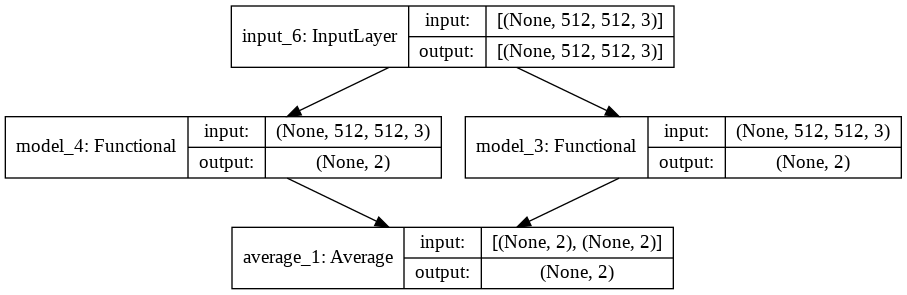

In [ ]:
tf.keras.utils.plot_model(ensemble_model, 'model.png', show_shapes= True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
filepath="parkinsons_detection_ensemble.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=5)
callbacks_list = [checkpoint]

**Model-Training**

In [ ]:
hist = ensemble_model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 25,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/25
30/30 [==============================] - 111s 2s/step - loss: 10.3162 - accuracy: 0.5673 - val_loss: 7.4399 - val_accuracy: 0.3654

Epoch 00001: val_loss improved from inf to 7.43994, saving model to parkinsons_detection_ensemble.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/25
30/30 [==============================] - 51s 2s/step - loss: 6.5461 - accuracy: 0.5321 - val_loss: 5.7870 - val_accuracy: 0.9615

Epoch 00002: val_loss improved from 7.43994 to 5.78704, saving model to parkinsons_detection_ensemble.hdf5
Epoch 3/25
30/30 [==============================] - 51s 2s/step - loss: 5.4091 - accuracy: 0.5641 - val_loss: 5.0706 - val_accuracy: 0.9135

Epoch 00003: val_loss improved from 5.78704 to 5.07061, saving model to parkinsons_detection_ensemble.hdf5
Epoch 4/25
30/30 [==============================] - 51s 2s/step - loss: 4.9063 - accuracy: 0.5662 - val_loss: 4.6739 - val_accuracy: 0.8846

Epoch 00004: val_loss improved from 5.07061 to 4.67390, saving model to parkinsons_detection_ensemble.hdf5
Epoch 5/25
30/30 [==============================] - 50s 2s/step - loss: 4.5024 - accuracy: 0.5748 - val_loss: 4.3365 - val_accuracy: 1.0000

Epoch 00005: val_loss improved from 4.67390 to 4.33650, saving model to parkinsons_detection_ensemble.hdf5
Epoch 6/

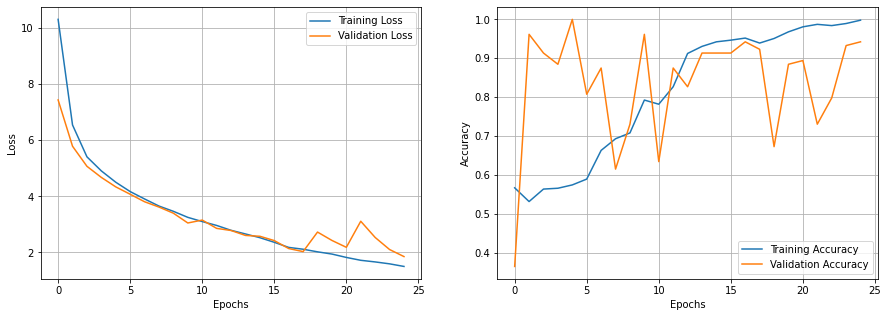

In [ ]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [ ]:
test_images = "/content/drive/MyDrive/parkinsons t2/test"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'control':0,
    'pd':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)
    

['pd', 'control']
(100, 512, 512, 3) (100, 2)


In [ ]:
ensemble_model.evaluate(x_test,y_test)

4/4 [==============================] - 10s 3s/step - loss: 2.6410 - accuracy: 0.8700


[2.6410446166992188, 0.8700000047683716]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = ensemble_model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        50
           1       1.00      0.74      0.85        50

    accuracy                           0.87       100
   macro avg       0.90      0.87      0.87       100
weighted avg       0.90      0.87      0.87       100



In [ ]:
print(confusion_matrix(test_labels, pred))

[[50  0]
 [13 37]]
